In [55]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [56]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")

## 데이터 로딩 및 가공

In [57]:
data = pd.read_csv("./output.csv")
data.head(1)

,Unnamed: 0,방이름,가격,방 수,욕실 수,주소,평 수,관리비,주차 여부,층,...,방향_남향(안방 기준),방향_동향(거실 기준),방향_동향(안방 기준),방향_북서향(거실 기준),방향_북향(거실 기준),방향_서향(거실 기준),방향_서향(안방 기준),건축물 용도_공동주택,건축물 용도_단독주택,건축물 용도_제2종 근린생활시설
0,0,일반원룸고층,300/29,1,1,서울시 강북구 우이동 61-19,6.35,5.0,0,4,...,1,0,0,0,0,0,0,0,1,0


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 40 columns):
Unnamed: 0           37 non-null int64
방이름                  37 non-null object
가격                   37 non-null object
방 수                  37 non-null int64
욕실 수                 37 non-null int64
주소                   37 non-null object
평 수                  37 non-null float64
관리비                  37 non-null float64
주차 여부                37 non-null int64
층                    37 non-null int64
총 층                  37 non-null int64
전세/월세                37 non-null object
부동산 이름               37 non-null object
부동산 전화번호             37 non-null object
복층 여부                37 non-null int64
사용승인일                37 non-null int64
내부시설                 37 non-null object
기타시설                 37 non-null object
대형마트 수               37 non-null int64
편의점 수                37 non-null int64
지하철역 수               37 non-null int64
학교 수                 37 non-null int64
문화시설 수               37 non

### 보증금, 전세, 월세 입력

In [10]:
rent = '월세'

In [12]:
if rent == '월세':
    print("보증금의 범위를 입력해주세요.")
    deposit_min = input("최소: ")
    deposit_max = input("최대: ")
    print("월세의 범위를 입력해주세요.")
    rent_min = input("최소: ")
    rent_max = input("최대: ")
else:
    print("전세금의 범위를 입력해주세요.")
    jeonse_min = input("최소: ")
    jeonse_max = input("최대: ")

보증금의 범위를 입력해주세요.
최소: 0
최대: 1000
월세의 범위를 입력해주세요.
최소: 50
최대: 100


### 가격 범위 밖의 데이터 삭제

In [15]:
del_idx = df[df['월세'] < rent_min and df['월세'] > rent_max and df['전세'] < deposit_min and df['전세'] > deposti_max].index
del_idx

KeyError: '월세'

### 추천 알고리즘에 활용하지 않는 열 삭제

In [59]:
# 주요 컬럼으로 데이터 프레임 생성
col_list = ['방 수', '욕실 수', '평 수', '층', '복층 여부', '사용승인일', '대형마트 수', '편의점 수', '지하철역 수', '문화시설 수', '음식점 수', '카페 수', '약국 수', '방향_남동향(거실 기준)', '방향_남동향(안방 기준)', '방향_남서향(거실 기준)', '방향_남향(거실 기준)', '방향_남향(안방 기준)', '방향_동향(거실 기준)', '방향_동향(안방 기준)', '방향_북서향(거실 기준)', '방향_북향(거실 기준)', '방향_북향(거실 기준)', '방향_서향(거실 기준)', '방향_서향(안방 기준)']
df = data[col_list]

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 25 columns):
방 수              37 non-null int64
욕실 수             37 non-null int64
평 수              37 non-null float64
층                37 non-null int64
복층 여부            37 non-null int64
사용승인일            37 non-null int64
대형마트 수           37 non-null int64
편의점 수            37 non-null int64
지하철역 수           37 non-null int64
문화시설 수           37 non-null int64
음식점 수            37 non-null int64
카페 수             37 non-null int64
약국 수             37 non-null int64
방향_남동향(거실 기준)    37 non-null int64
방향_남동향(안방 기준)    37 non-null int64
방향_남서향(거실 기준)    37 non-null int64
방향_남향(거실 기준)     37 non-null int64
방향_남향(안방 기준)     37 non-null int64
방향_동향(거실 기준)     37 non-null int64
방향_동향(안방 기준)     37 non-null int64
방향_북서향(거실 기준)    37 non-null int64
방향_북향(거실 기준)     37 non-null int64
방향_북향(거실 기준)     37 non-null int64
방향_서향(거실 기준)     37 non-null int64
방향_서향(안방 기준)     37 non-null int64
dtypes: float64(1), 

## EDA

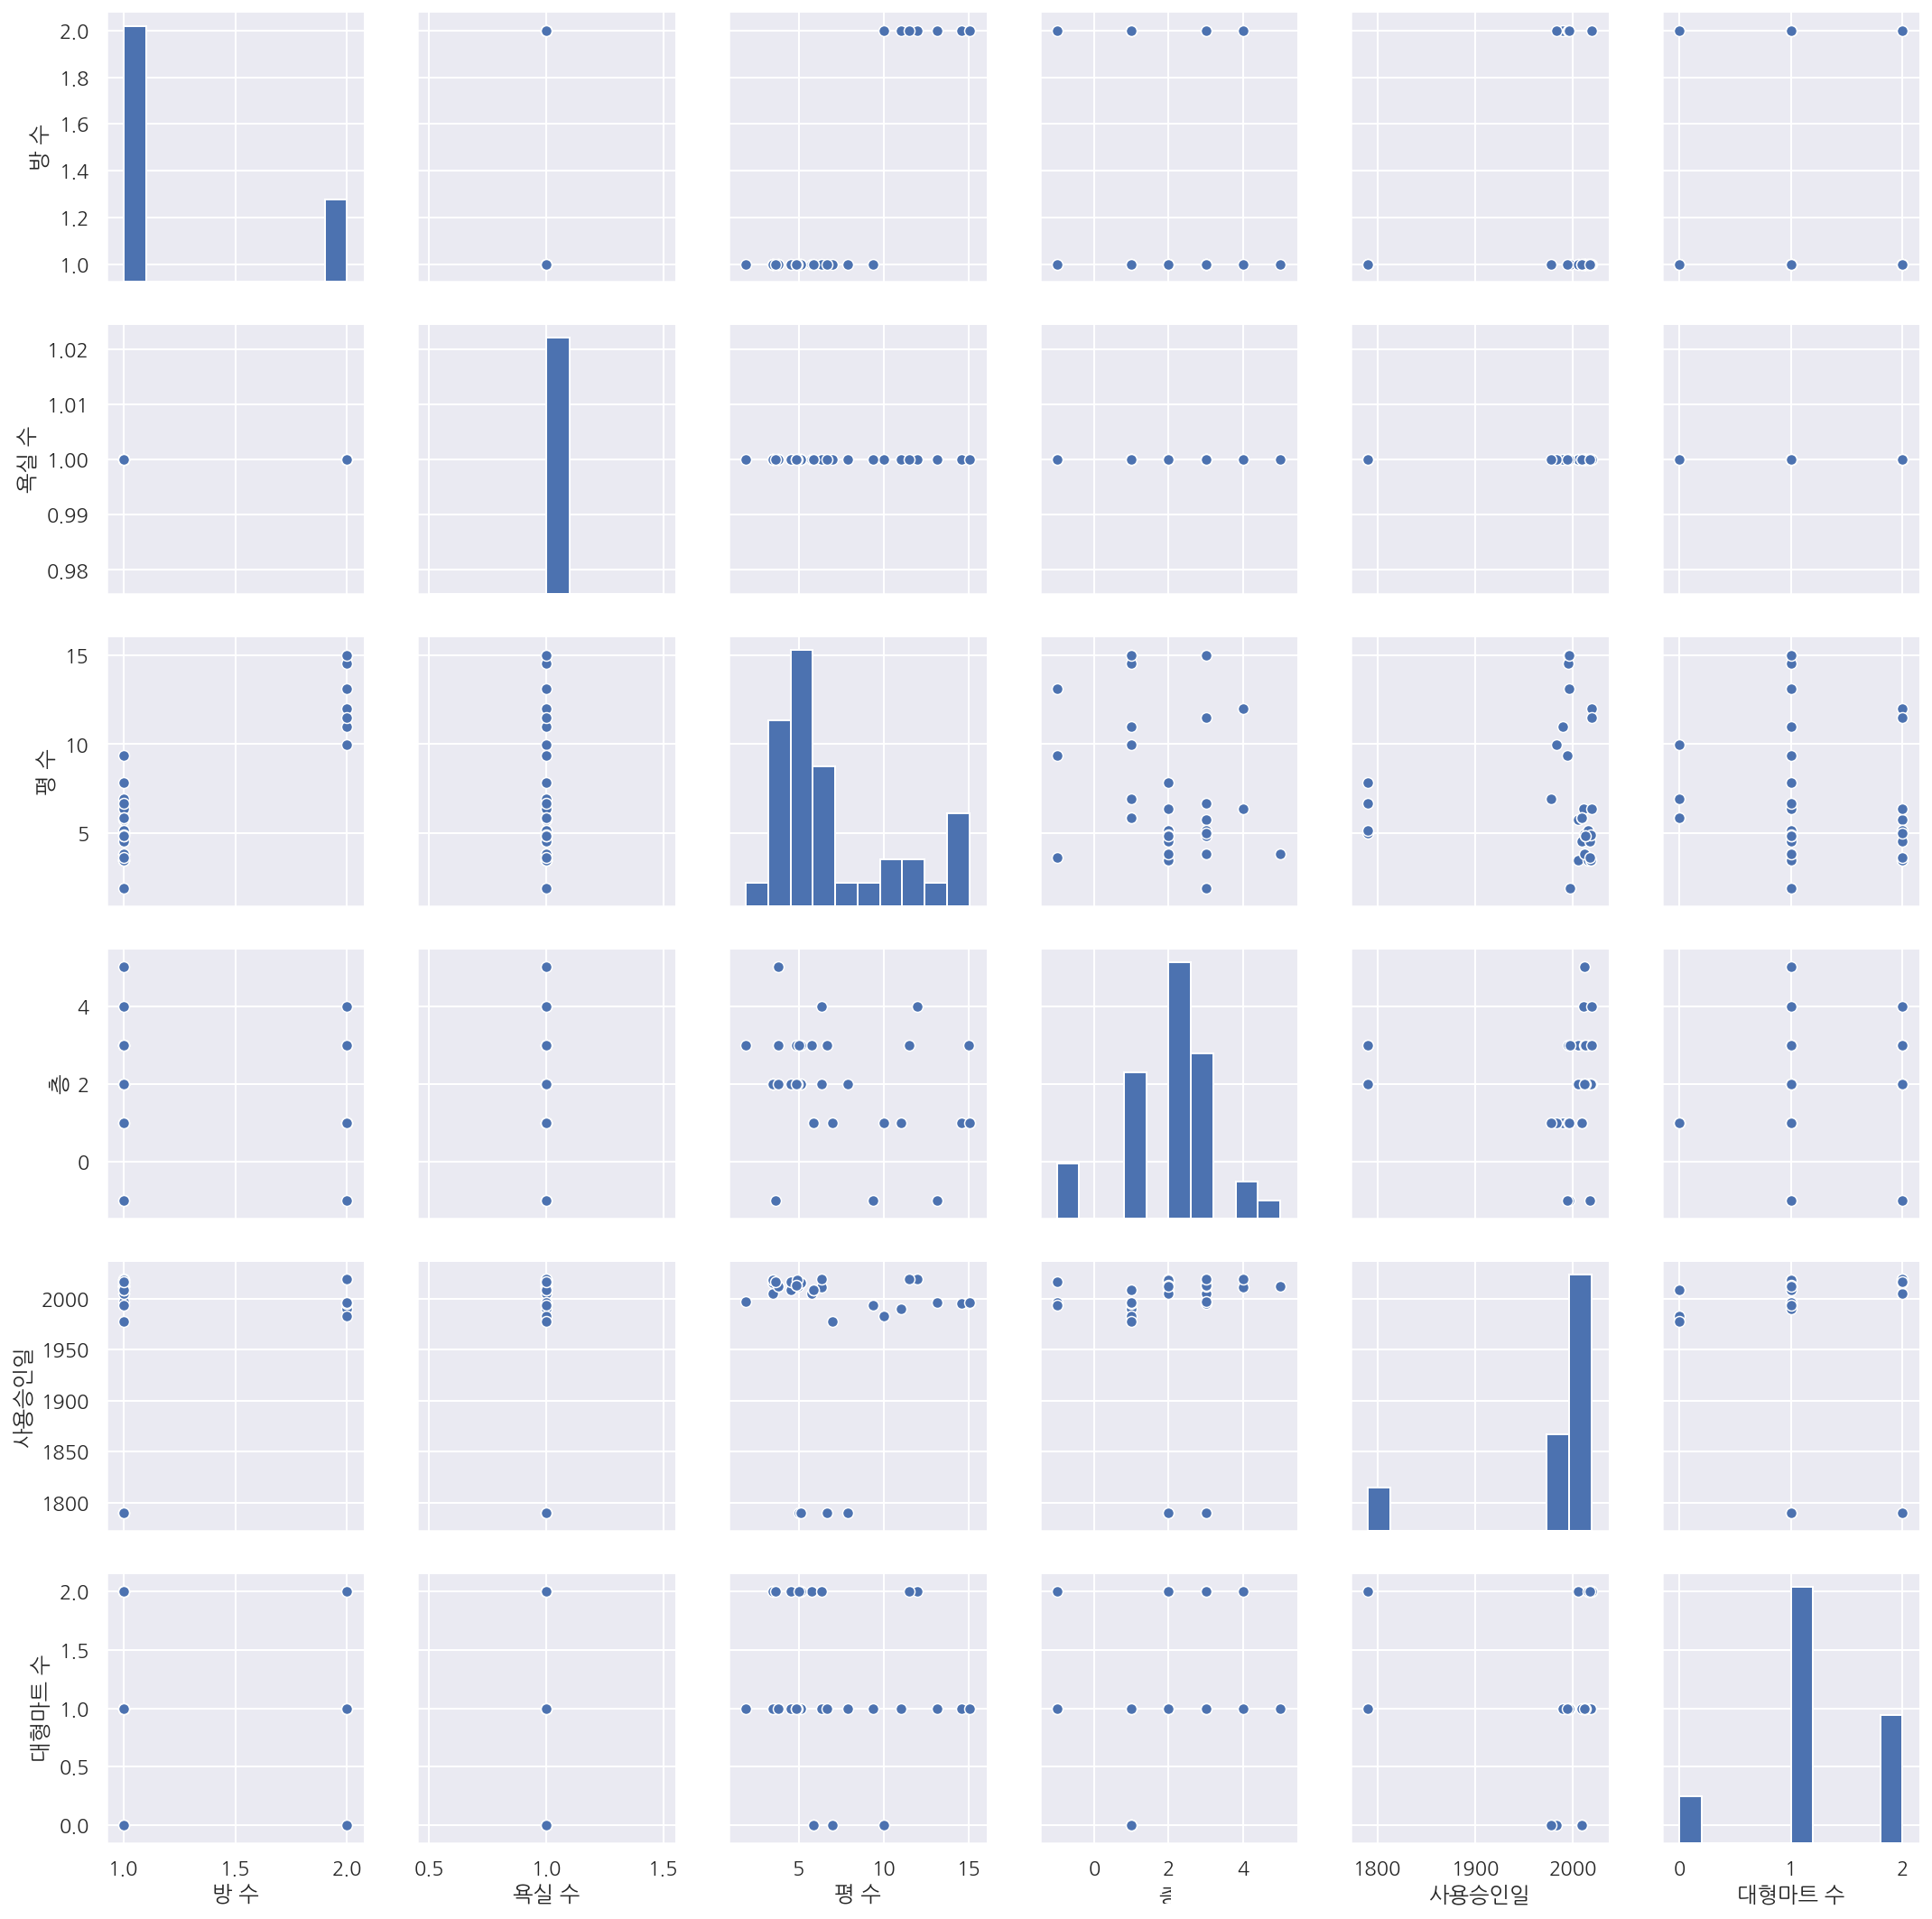

In [61]:
import seaborn as sns
sns_plot = sns.pairplot(df[['방 수', '욕실 수', '평 수', '층', '사용승인일', '대형마트 수']])
sns_plot.savefig("output.png")

## 추천

### 예시 유저 아이템 생성

In [62]:
mean_df = df.mean()
mean_df

방 수                 1.243243
욕실 수                1.000000
평 수                 6.976216
층                   1.972973
복층 여부               0.000000
사용승인일            1983.648649
대형마트 수              1.189189
편의점 수               2.162162
지하철역 수              0.972973
문화시설 수              2.405405
음식점 수              64.729730
카페 수               14.702703
약국 수                7.027027
방향_남동향(거실 기준)       0.027027
방향_남동향(안방 기준)       0.027027
방향_남서향(거실 기준)       0.108108
방향_남향(거실 기준)        0.135135
방향_남향(안방 기준)        0.162162
방향_동향(거실 기준)        0.189189
방향_동향(안방 기준)        0.054054
방향_북서향(거실 기준)       0.027027
방향_북향(거실 기준)        0.027027
방향_북향(거실 기준)        0.027027
방향_서향(거실 기준)        0.162162
방향_서향(안방 기준)        0.081081
dtype: float64

In [63]:
u_item = [1, 1, 7, 2, 0, 2010, 1, 3, 1, 1, 50, 10, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### 추천

In [64]:
from sklearn.metrics.pairwise import cosine_similarity

# similarity_market = cosine_similarity([df['대형마트 수']], [df['대형마트 수']]).argsort()[:,::-1]
# print(similarity_market)

In [65]:
def recommendation(user_item):
    df.to_numpy()
    similarity = cosine_similarity(df, [user_item])
    data['similarity'] = similarity.reshape(-1,1)
    return data
    

In [66]:
recommendation(u_item)

,Unnamed: 0,방이름,가격,방 수,욕실 수,주소,평 수,관리비,주차 여부,층,...,방향_동향(거실 기준),방향_동향(안방 기준),방향_북서향(거실 기준),방향_북향(거실 기준),방향_서향(거실 기준),방향_서향(안방 기준),건축물 용도_공동주택,건축물 용도_단독주택,건축물 용도_제2종 근린생활시설,similarity
0,0,일반원룸고층,300/29,1,1,서울시 강북구 우이동 61-19,6.35,5.0,0,4,...,0,0,0,0,0,0,0,1,0,0.999997
1,1,일반원룸고층,300/29,2,1,서울시 강북구 우이동 23-38,13.11,2.0,0,-1,...,0,0,0,0,0,1,1,0,0,0.999965
2,2,빌라B1층,"1,000/45",1,1,서울시 강북구 우이동 71-21,5.74,5.0,0,3,...,0,0,0,0,1,0,0,0,1,0.999494
3,3,일반원룸3층,"3,000/25",1,1,서울시 강북구 우이동 56-45,4.95,5.0,0,2,...,1,0,0,0,0,0,1,0,0,0.999965
4,4,일반원룸2층,500/38,1,1,서울시 강북구 우이동 72-157,6.35,6.0,0,2,...,1,0,0,0,0,0,0,0,1,0.999289
5,5,일반원룸2층,500/50,1,1,서울시 강북구 우이동 100-57,3.81,2.0,0,3,...,0,0,0,0,0,0,0,1,0,0.999992
6,6,일반원룸3층,300/30,1,1,서울시 강북구 우이동 100-57,3.81,2.0,0,5,...,0,0,0,0,0,0,0,1,0,0.999991
7,7,일반원룸고층,300/30,1,1,서울시 강북구 우이동 100-28,4.53,2.0,1,2,...,1,0,0,0,0,0,0,1,0,0.999991
8,8,일반원룸중층,500/30,1,1,서울시 강북구 우이동 72-66,5.14,2.0,0,3,...,1,0,0,0,0,0,0,1,0,0.998963
9,9,일반원룸,300/45,1,1,서울시 강북구 우이동 72-66,5.14,2.0,0,2,...,1,0,0,0,0,0,0,1,0,0.998964


In [67]:
# 유사도로 내림차순 정렬 후 상위 인덱스 추출
top_n = 10
final_df = data.sort_values(by="similarity", ascending=False)
recommend_df = final_df.head(10)
recommend_df

,Unnamed: 0,방이름,가격,방 수,욕실 수,주소,평 수,관리비,주차 여부,층,...,방향_동향(거실 기준),방향_동향(안방 기준),방향_북서향(거실 기준),방향_북향(거실 기준),방향_서향(거실 기준),방향_서향(안방 기준),건축물 용도_공동주택,건축물 용도_단독주택,건축물 용도_제2종 근린생활시설,similarity
0,0,일반원룸고층,300/29,1,1,서울시 강북구 우이동 61-19,6.35,5.0,0,4,...,0,0,0,0,0,0,0,1,0,0.999997
19,19,일반원룸3층,500/39,1,1,서울시 강북구 우이동 100-28,5.13,5.0,0,2,...,0,0,0,0,0,0,0,1,0,0.999995
28,28,빌라2층,500/40,1,1,서울시 강북구 우이동 100-57,3.81,2.0,1,2,...,0,0,0,0,1,0,0,0,1,0.999992
5,5,일반원룸2층,500/50,1,1,서울시 강북구 우이동 100-57,3.81,2.0,0,3,...,0,0,0,0,0,0,0,1,0,0.999992
14,14,다가구1층,"3,000/40",2,1,서울시 강북구 우이동 20-3,14.55,2.0,1,1,...,0,0,0,0,0,0,1,0,0,0.999992
6,6,일반원룸3층,300/30,1,1,서울시 강북구 우이동 100-57,3.81,2.0,0,5,...,0,0,0,0,0,0,0,1,0,0.999991
7,7,일반원룸고층,300/30,1,1,서울시 강북구 우이동 100-28,4.53,2.0,1,2,...,1,0,0,0,0,0,0,1,0,0.999991
12,12,다가구1층,"3,000/20",2,1,서울시 강북구 우이동 100-39,14.99,2.0,0,3,...,0,0,0,0,1,0,0,1,0,0.999988
33,33,일반원룸,500/29,1,1,서울시 강북구 우이동 61-19,6.65,5.0,1,3,...,0,0,0,0,0,0,0,1,0,0.999987
20,20,일반원룸중층,"3,000/45",1,1,서울시 강북구 우이동 100-35,7.86,3.0,1,2,...,0,0,0,0,0,1,0,1,0,0.999986
